In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from difflib import SequenceMatcher
from matplotlib import colormaps

pd.options.mode.chained_assignment = None

In [2]:
def get_text_list(file_path):
    with open(file_path, 'rb') as f:
        texts = pd.read_csv(f, sep='\t', encoding='utf-16 LE')
    return list(texts[texts['text_graph_desc'] == True]['text_id'])

In [ ]:
paths = ['/home/zlovoblachko/local_realec/Exam2014/Task 1/Exam2014_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2015/Task 1/Exam2015_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2016/Task 1/Exam2016_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2017/Task 1/Exam2017_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2019/Task 1/Exam2019_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 1/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 2/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 3/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 4/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 5/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 6/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 7/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 8/Exam2020_text_table.tsv']

relevant_texts_nums = []

for path in paths:
    relevant_texts_nums.append(get_text_list(path))

In [7]:
def get_mistakes_tables(file_path, texts_list):
    with open(file_path, 'rb') as f:
        year_corpus = pd.read_csv(f, sep='\t', encoding='utf-16 LE')
    year_corpus['year'] = '_'.join(file_path.split('/')[4:6])
    return year_corpus[year_corpus['text_id'].isin(texts_list)]

In [8]:
paths_mistakes = ['/home/zlovoblachko/local_realec/Exam2014/Task 1/Exam2014_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2015/Task 1/Exam2015_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2016/Task 1/Exam2016_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2017/Task 1/Exam2017_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2019/Task 1/Exam2019_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 1/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 2/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 3/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 4/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 5/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 6/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 7/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 8/Exam2020_mistakes_table.tsv']

relevant_mistakes_all_df = pd.DataFrame()

In [9]:
for file_path, text_list in zip(paths_mistakes, relevant_texts_nums):
    relevant_mistakes_all_df = pd.concat([relevant_mistakes_all_df, get_mistakes_tables(file_path, text_list)])

relevant_mistakes_all_df.head()

/tmp/ipykernel_31390/1294121175.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  year_corpus = pd.read_csv(f, sep='\t', encoding='utf-16 LE')
/tmp/ipykernel_31390/1294121175.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  year_corpus = pd.read_csv(f, sep='\t', encoding='utf-16 LE')
/tmp/ipykernel_31390/1294121175.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  year_corpus = pd.read_csv(f, sep='\t', encoding='utf-16 LE')


,mistake_id,text_id,sentence_id,ann_id,mistake_type,error_span,error_span_poses,cause,correction,first_token_id,...,mistake_corrected,correction_tokens,correction_poses,correction_lemmas,correction_token_spaces,ref_1,ref_2,span_start,span_end,year
0,1,1,7,T,Spelling,tendention,NN1,NaN,tendency,193,...,True,tendency,NN1,tendency,0,NaN,NaN,868,878,Exam2014_Task 1
1,2,1,1,T,Agreement_errors,visualize,VVB,NaN,demonstrates,3,...,False,demonstrates,VVZ,demonstrate,0,NaN,NaN,14,23,Exam2014_Task 1
2,3,1,4,T,Redundant_comp,part,NN1,NaN,NaN,108,...,False,NaN,NaN,NaN,NaN,NaN,NaN,509,513,Exam2014_Task 1
3,4,1,4,A,Delete,NaN,NaN,NaN,NaN,108,...,False,NaN,NaN,NaN,NaN,3.0,NaN,not found,not found,Exam2014_Task 1
4,5,1,5,T,Spelling,whew,VVB,NaN,when,149,...,True,when,AVQ,when,0,NaN,NaN,687,691,Exam2014_Task 1


In [108]:
mistakes_use = relevant_mistakes_all_df[['mistake_id', 'text_id', 'sentence_id', 'mistake_type', 'error_span', 'correction', 'span_start', 'span_end', 'year']]
mistakes_use.head()

,mistake_id,text_id,sentence_id,mistake_type,error_span,correction,span_start,span_end,year
0,1,1,7,Spelling,tendention,tendency,868,878,Exam2014_Task 1
1,2,1,1,Agreement_errors,visualize,demonstrates,14,23,Exam2014_Task 1
2,3,1,4,Redundant_comp,part,NaN,509,513,Exam2014_Task 1
3,4,1,4,Delete,NaN,NaN,not found,not found,Exam2014_Task 1
4,5,1,5,Spelling,whew,when,687,691,Exam2014_Task 1


In [109]:
mistakes_use.groupby('mistake_type').size()

mistake_type
Absence_comp_sent       2343
Absence_explanation     1690
Adj_as_collective         14
Adjectives                43
Adverbs                   14
                       ...  
note                     416
punct                   8595
spell                   1487
suggestion               853
vocab                  10382
Length: 80, dtype: int64

<Axes: xlabel='mistake_type'>

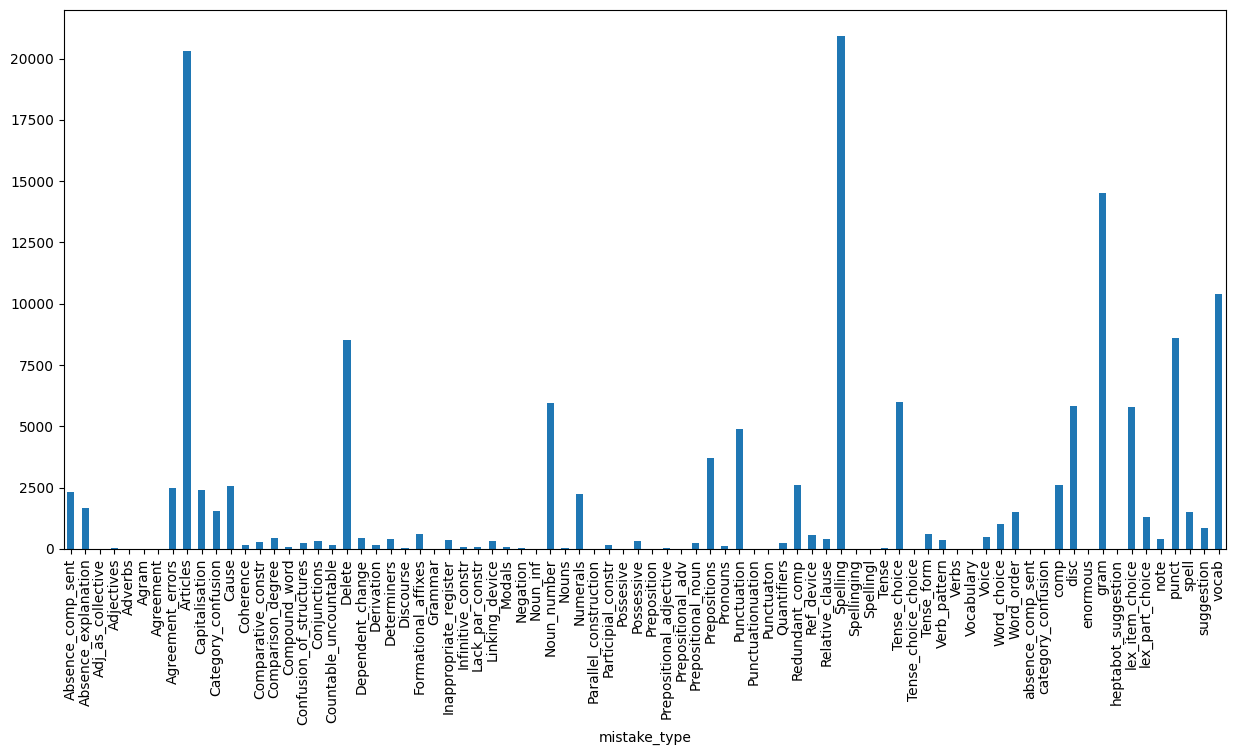

In [110]:
plt.figure(figsize=(15, 7))
mistakes_use.groupby('mistake_type').size().plot(kind='bar')

<Axes: xlabel='mistake_type'>

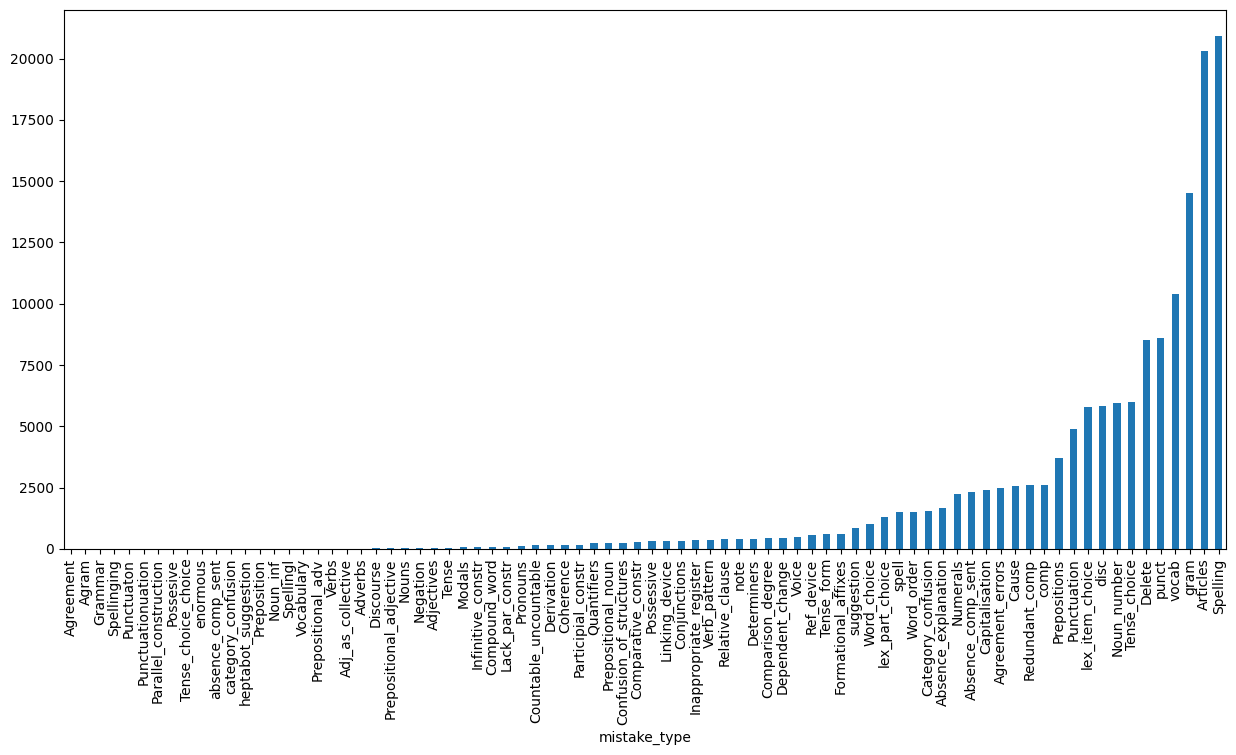

In [111]:
plt.figure(figsize=(15, 7))
mistakes_use.groupby('mistake_type').size().sort_values().plot(kind='bar')

<Axes: xlabel='mistake_type'>

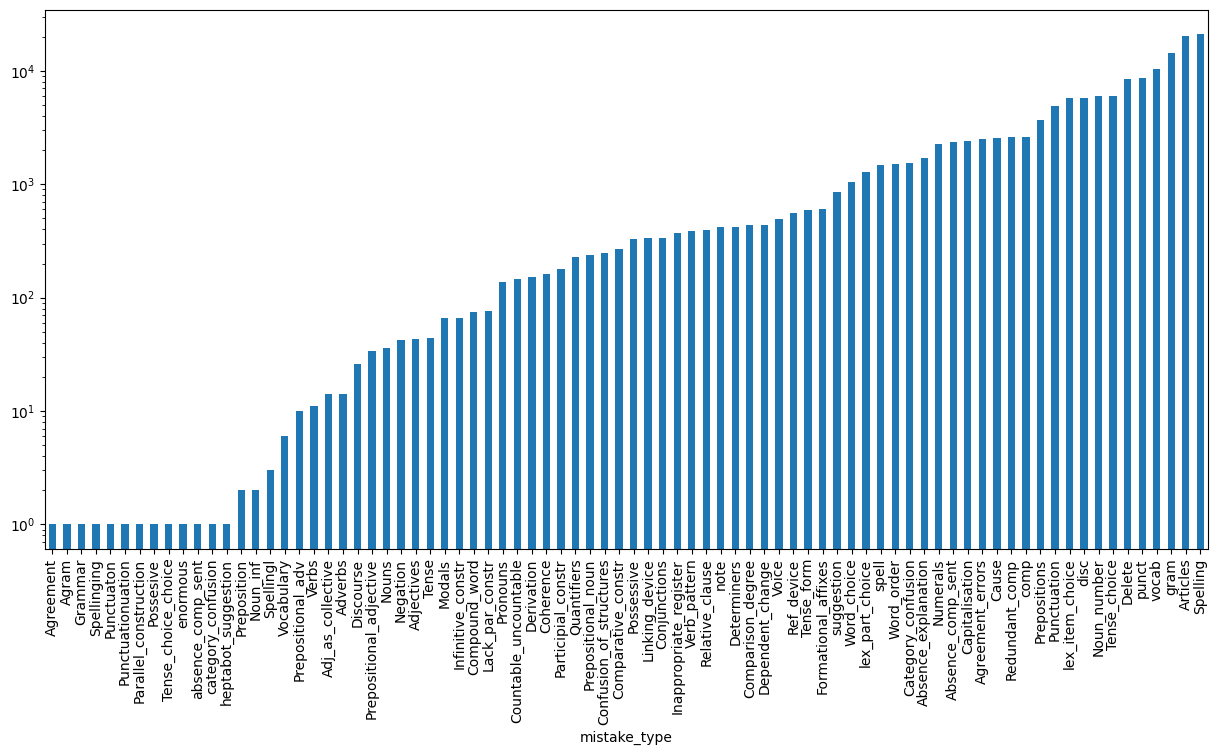

In [112]:
plt.figure(figsize=(15, 7))
mistakes_use.groupby('mistake_type').size().sort_values().plot(kind='bar', logy=True)

In [113]:
mistakes_filtered = mistakes_use[mistakes_use['mistake_type'].isin(['Punctuation',
                                                                    'Capitalisation',
                                                                    'Spelling',
                                                                    'Determiners',
                                                                    'Verbs',
                                                                    'Nouns',
                                                                    'Prepositions',
                                                                    'Conjunctions',
                                                                    'Adjectives',
                                                                    'Adverbs',
                                                                    'Numerals',
                                                                    'Pronouns',
                                                                    'Articles',
                                                                    'Redundant_comp',
                                                                    'Prepositional_noun',
                                                                    'Noun_number',
                                                                    'Countable_uncountable',
                                                                    'Tense',
                                                                    'Tense_choice',
                                                                    'Tense_form',
                                                                    'Voice',
                                                                    'Modals',
                                                                    'Verb_pattern',
                                                                    'Prepositional_adjective',
                                                                    'Participal_constr',
                                                                    'Agreement',
                                                                    'Word_order',
                                                                    'Relative_clause',
                                                                    'Parallel_construction',
                                                                    'Confusion_of_structures',
                                                                    'Word_choice',
                                                                    'Derivation',
                                                                    'Category_confusion',
                                                                    'Formational_affixes',
                                                                    'Coherence',
                                                                    'Linking_device',
                                                                    'Ref_device',
                                                                    'Inappropriate_register',
                                                                    'Absence_comp_sent',
                                                                    'Redundant_comp',
                                                                    'Absence_explanation'])]

mistakes_filtered.reset_index(inplace=True)

<Axes: xlabel='mistake_type'>

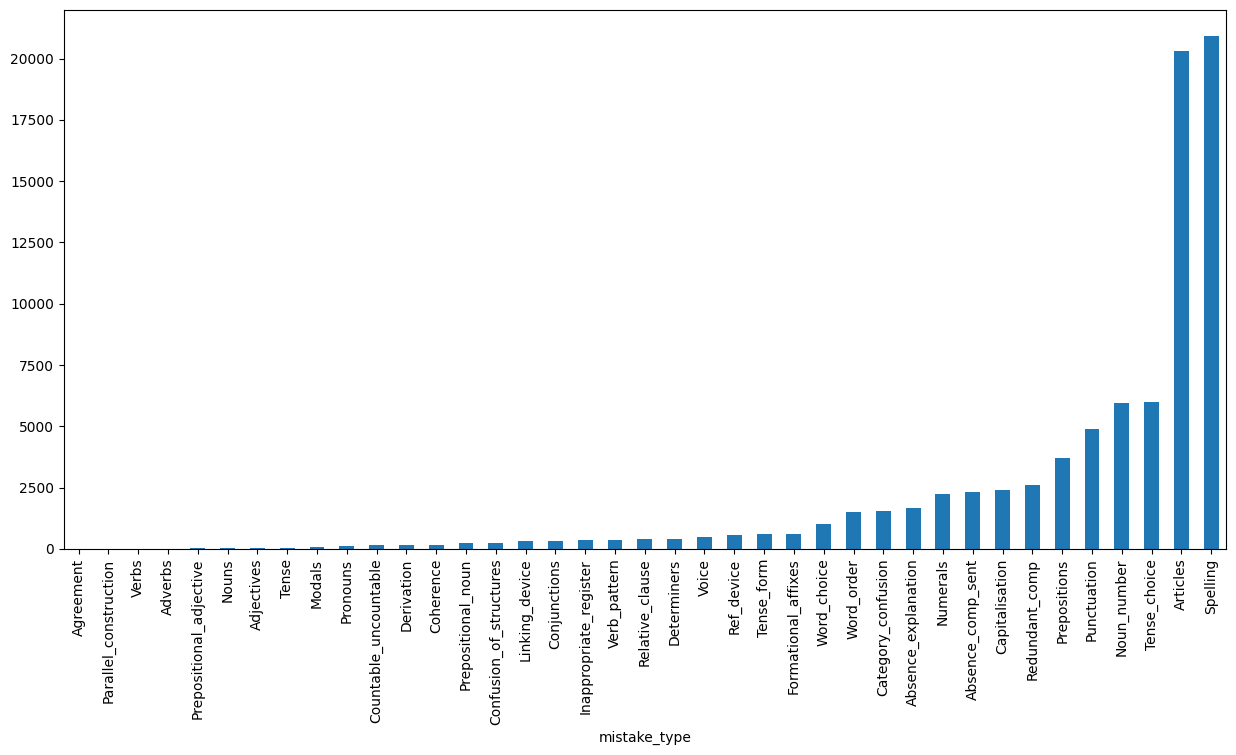

In [114]:
plt.figure(figsize=(15, 7))
mistakes_filtered.groupby('mistake_type').size().sort_values().plot(kind='bar')

<Axes: xlabel='mistake_type'>

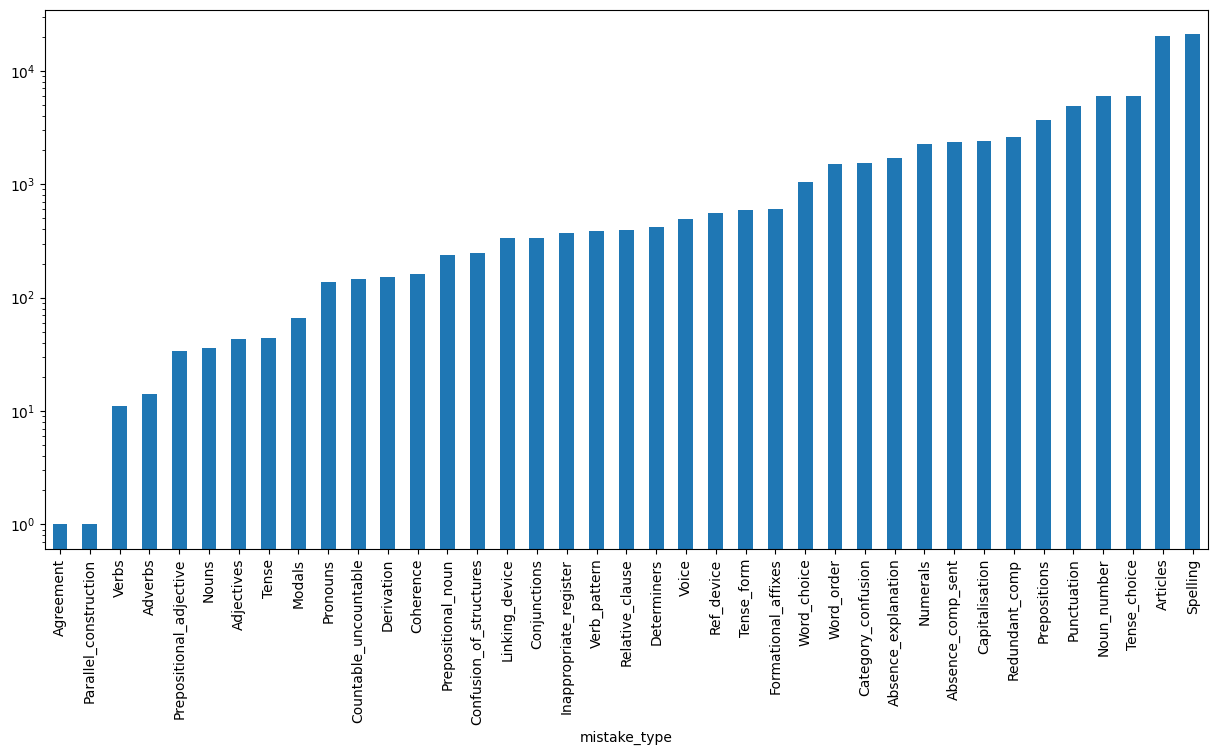

In [115]:
plt.figure(figsize=(15, 7))
mistakes_filtered.groupby('mistake_type').size().sort_values().plot(kind='bar', logy=True)

In [116]:
mistakes_filtered.groupby('mistake_type').size().sort_values()

mistake_type
Agreement                      1
Parallel_construction          1
Verbs                         11
Adverbs                       14
Prepositional_adjective       34
Nouns                         36
Adjectives                    43
Tense                         44
Modals                        66
Pronouns                     138
Countable_uncountable        145
Derivation                   153
Coherence                    162
Prepositional_noun           239
Confusion_of_structures      246
Linking_device               336
Conjunctions                 336
Inappropriate_register       369
Verb_pattern                 385
Relative_clause              393
Determiners                  421
Voice                        492
Ref_device                   560
Tense_form                   594
Formational_affixes          603
Word_choice                 1038
Word_order                  1501
Category_confusion          1553
Absence_explanation         1690
Numerals                    22

Отфильтруем все, что ниже 50:

In [117]:
mistakes_filtered

,index,mistake_id,text_id,sentence_id,mistake_type,error_span,correction,span_start,span_end,year
0,0,1,1,7,Spelling,tendention,tendency,868,878,Exam2014_Task 1
1,2,3,1,4,Redundant_comp,part,NaN,509,513,Exam2014_Task 1
2,4,5,1,5,Spelling,whew,when,687,691,Exam2014_Task 1
3,5,6,1,1,Articles,Given diagram,The given diagram,0,13,Exam2014_Task 1
4,7,8,1,2,Absence_explanation,century,XXth century,200,207,Exam2014_Task 1
...,...,...,...,...,...,...,...,...,...,...
82983,9493,16,453,5,Articles,the young age participants,young age participants,623,649,Exam2020_Task 8
82984,9501,24,453,6,Noun_number,group,"groups,",827,832,Exam2020_Task 8
82985,9571,5,455,1,Articles,a a great variety,a great variety,49,66,Exam2020_Task 8
82986,9574,8,455,2,Articles,the approximately the same range,approximately the same range,176,208,Exam2020_Task 8


In [118]:
mistakes_filtered_2 = mistakes_filtered[-mistakes_filtered['mistake_type'].isin(['Agreement', 
                                                                                 'Verbs', 
                                                                                 'Adverbs',
                                                                                 'Prepositional_adjective', 
                                                                                 'Nouns', 
                                                                                 'Adjectives', 
                                                                                 'Tense',
                                                                                 'Spelling',
                                                                                 'Parallel_construction'])]

mistakes_filtered_2.reset_index(inplace=True)

<Axes: xlabel='mistake_type'>

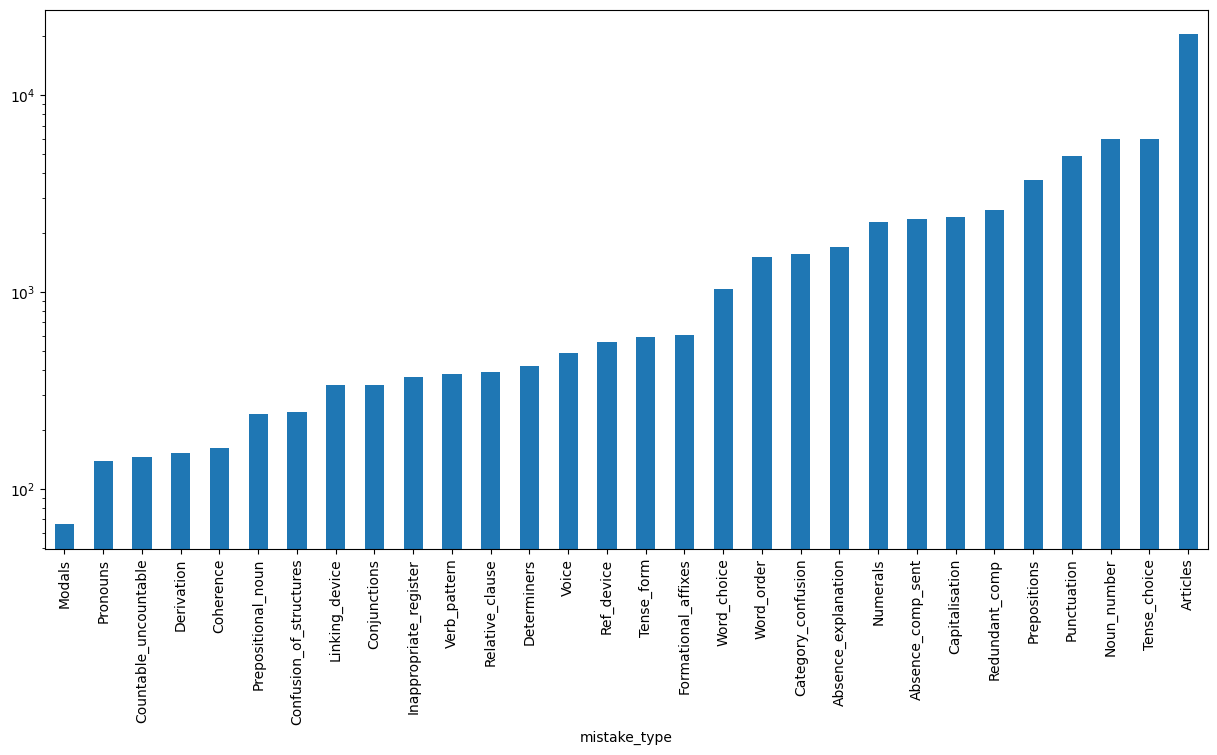

In [119]:
plt.figure(figsize=(15, 7))
mistakes_filtered_2.groupby('mistake_type').size().sort_values().plot(kind='bar', logy=True)

In [120]:
mistakes_filtered_2.to_csv('/home/zlovoblachko/diploma/Filtered_orig_tags.tsv', sep='\t', encoding='utf-8', index=False)

## Укрупнение тегов REALEC

In [121]:
mistakes_filtered_2['bigger_code'] = ['Grammar' if x in['Modals',
                                                        'Pronouns',
                                                        'Countable_uncountable',
                                                        'Prepositional_noun',
                                                        'Conjunctions',
                                                        'Verb_pattern',
                                                        'Determiners',
                                                        'Voice',
                                                        'Tense_form',
                                                        'Numerals',
                                                        'Prepositions',
                                                        'Noun_number',
                                                        'Tense_choice',
                                                        'Articles'] else 'Vocabulary' if x in ['Derivation',
                                                                                               'Formational_affixes',
                                                                                               'Word_choice',
                                                                                               'lex_item_choice',
                                                                                               'Category_confusion'] else 'Discourse' if x in ['Coherence',
                                                                                                                                               'Linking_device',
                                                                                                                                               'Ref_device',
                                                                                                                                               'Inappropriate_register',
                                                                                                                                               'lex_item_choice',
                                                                                                                                               'Absence_explanation',
                                                                                                                                               'Absence_comp_sent',
                                                                                                                                               'Redundant_comp'] else 'Syntax' if x in ['Word_order',
                                                                                                                                                                                        'Relative_clause',
                                                                                                                                                                                        'Confusion_of_structures'] else 'Punctuation' if x == 'Punctuation' else 'Capitalisation' if x == 'Capitalisation' else 'None' for x in mistakes_filtered_2['mistake_type']]

In [122]:
mistakes_filtered_2

,level_0,index,mistake_id,text_id,sentence_id,mistake_type,error_span,correction,span_start,span_end,year,bigger_code
0,1,2,3,1,4,Redundant_comp,part,NaN,509,513,Exam2014_Task 1,Discourse
1,3,5,6,1,1,Articles,Given diagram,The given diagram,0,13,Exam2014_Task 1,Grammar
2,4,7,8,1,2,Absence_explanation,century,XXth century,200,207,Exam2014_Task 1,Discourse
3,5,9,10,1,4,Articles,a population,the Japanese population,436,448,Exam2014_Task 1,Grammar
4,6,10,11,1,4,Absence_explanation,a population,the Japanese population,436,448,Exam2014_Task 1,Discourse
...,...,...,...,...,...,...,...,...,...,...,...,...
61864,82983,9493,16,453,5,Articles,the young age participants,young age participants,623,649,Exam2020_Task 8,Grammar
61865,82984,9501,24,453,6,Noun_number,group,"groups,",827,832,Exam2020_Task 8,Grammar
61866,82985,9571,5,455,1,Articles,a a great variety,a great variety,49,66,Exam2020_Task 8,Grammar
61867,82986,9574,8,455,2,Articles,the approximately the same range,approximately the same range,176,208,Exam2020_Task 8,Grammar


<Axes: >

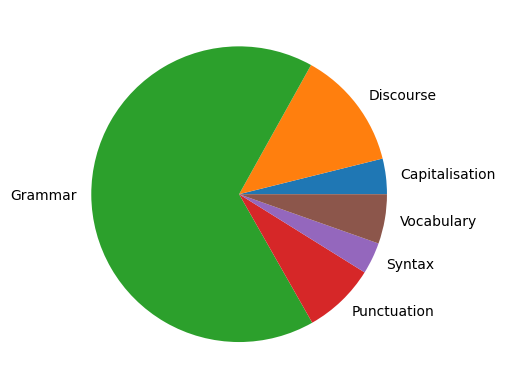

In [123]:
mistakes_filtered_2.groupby('bigger_code').size().plot(kind='pie')

In [124]:
articles_df = mistakes_filtered_2[mistakes_filtered_2['mistake_type'] == 'Articles']
articles_sampled_df = articles_df.sample(n=2000, random_state=1)
non_articles_df = mistakes_filtered_2[mistakes_filtered_2['mistake_type'] != 'Articles']
choice_df = mistakes_filtered_2[mistakes_filtered_2['mistake_type'] == 'Tense_choice']
choice_sampled_df = articles_df.sample(n=2000, random_state=1)
number_df = mistakes_filtered_2[mistakes_filtered_2['mistake_type'] == 'Noun_number']
number_sampled_df = articles_df.sample(n=2000, random_state=1)
prep_df = mistakes_filtered_2[mistakes_filtered_2['mistake_type'] == 'Prepositions']
prep_sampled_df = articles_df.sample(n=2000, random_state=1)
non_df = mistakes_filtered_2[-mistakes_filtered_2['mistake_type'].isin(['Articles', 'Tense_choice', 'Noun_number', 'Prepositions'])]
filtered_mistakes_df = pd.concat([non_df, articles_sampled_df, choice_sampled_df, number_sampled_df, prep_sampled_df])
filtered_mistakes_df.reset_index(drop=True, inplace=True)
filtered_mistakes_df

,level_0,index,mistake_id,text_id,sentence_id,mistake_type,error_span,correction,span_start,span_end,year,bigger_code
0,1,2,3,1,4,Redundant_comp,part,NaN,509,513,Exam2014_Task 1,Discourse
1,4,7,8,1,2,Absence_explanation,century,XXth century,200,207,Exam2014_Task 1,Discourse
2,6,10,11,1,4,Absence_explanation,a population,the Japanese population,436,448,Exam2014_Task 1,Discourse
3,8,12,13,1,4,Punctuation,",",-,482,483,Exam2014_Task 1,Punctuation
4,10,16,17,1,5,Absence_explanation,century,XXth century,583,590,Exam2014_Task 1,Discourse
...,...,...,...,...,...,...,...,...,...,...,...,...
33909,13518,1203,33,42,6,Articles,a country,the countryside,854,863,Exam2015_Task 1,Grammar
33910,70489,11024,20,583,6,Articles,"the normal, was the same","normal, was the same",693,717,Exam2020_Task 5,Grammar
33911,70987,15326,10,794,3,Articles,quantity,the quantity,525,533,Exam2020_Task 5,Grammar
33912,61451,39490,18,1831,8,Articles,young age,a young age,811,820,Exam2020_Task 2,Grammar


<Axes: >

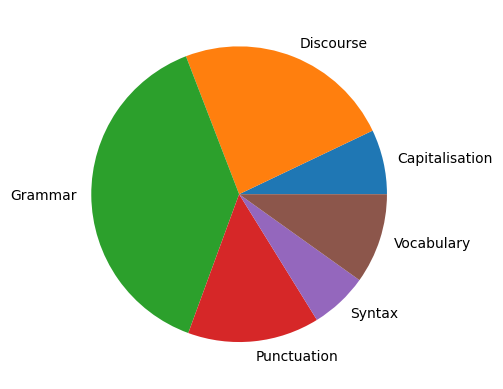

In [125]:
filtered_mistakes_df.groupby('bigger_code').size().plot(kind='pie')

In [126]:
filtered_mistakes_df.groupby('bigger_code').size()

bigger_code
Capitalisation     2399
Discourse          8066
Grammar           13076
Punctuation        4886
Syntax             2140
Vocabulary         3347
dtype: int64

## Моя система тегов

In [127]:
def assign_tag(error_span: str, correction_span: str):
    if correction_span == '':
        return "U"
    error_words = error_span.lower().split()
    correction_words = correction_span.lower().split()
    matcher = SequenceMatcher(None, error_words, correction_words)
    operations = matcher.get_opcodes()
    for tag, i1, i2, j1, j2 in operations:
        if tag == "insert":
            return "M"  # A word is added
        elif tag == "delete":
            return "U"  # A word is removed
        elif tag == "replace":
            return "R"  # A word is replaced
    return "R"  # Default to "R" if no change is detected (edge case)

mistakes_labelling = mistakes_filtered_2.dropna()
mistakes_labelling["first_level_tag"] = mistakes_labelling.apply(lambda row: assign_tag(row["error_span"], row["correction"]), axis=1)

In [128]:
mistake_types = mistakes_labelling["mistake_type"].unique()
mistake_types

array(['Articles', 'Absence_explanation', 'Tense_choice', 'Punctuation',
       'Word_choice', 'Ref_device', 'Formational_affixes', 'Numerals',
       'Relative_clause', 'Tense_form', 'Prepositional_noun',
       'Prepositions', 'Category_confusion', 'Voice', 'Derivation',
       'Redundant_comp', 'Confusion_of_structures', 'Noun_number',
       'Word_order', 'Absence_comp_sent', 'Pronouns', 'Verb_pattern',
       'Coherence', 'Determiners', 'Linking_device', 'Capitalisation',
       'Conjunctions', 'Modals', 'Countable_uncountable',
       'Inappropriate_register'], dtype=object)

Первая версия

In [129]:
errors_correspondence = {'Articles': 'DET: ART',
                         'lex_item_choice': 'WORD',
                         'Absence_explanation': 'MULTIWORD',
                         'Tense_choice': 'VERB: TENSE', 
                         'Punctuation': 'PUNCT', 
                         'Word_choice': 'MULTIWORD', 
                         'Ref_device': 'REF',
                         'Formational_affixes': 'FORM',
                         'Numerals': 'NUM', 
                         'Relative_clause': 'RELCL', 
                         'Tense_form': 'VERB: TENSE',
                         'Prepositional_noun': 'PREP', 
                         'Prepositions': 'PREP', 
                         'Category_confusion': 'MORPH',
                         'Voice': 'VERB: FORM', 
                         'Derivation': 'FORM', 
                         'Redundant_comp': 'MULTIWORD', 
                         'Confusion_of_structures': 'STRUCT',
                         'Noun_number': 'FORM', 
                         'Word_order': 'WO', 
                         'Absence_comp_sent': 'STRUCT', 
                         'Pronouns': 'PRON',
                         'Verb_pattern': 'PATTERN', 
                         'Coherence': 'COHER', 
                         'Determiners': 'DET', 
                         'Linking_device': 'LINK',
                         'Capitalisation': 'ORTH', 
                         'Conjunctions': 'CONJ', 
                         'Modals': 'VERB: INFL',
                         'Countable_uncountable': 'FORM', 
                         'Inappropriate_register': 'MULTIWORD'}

In [130]:
def assign_secondary_tag(realec_tag):
    return errors_correspondence[realec_tag]

In [131]:
mistakes_labelling["second_level_tag"] = mistakes_labelling.apply(lambda row: assign_secondary_tag(row["mistake_type"]), axis=1)

In [132]:
mistakes_labelling

,level_0,index,mistake_id,text_id,sentence_id,mistake_type,error_span,correction,span_start,span_end,year,bigger_code,first_level_tag,second_level_tag
1,3,5,6,1,1,Articles,Given diagram,The given diagram,0,13,Exam2014_Task 1,Grammar,M,DET: ART
2,4,7,8,1,2,Absence_explanation,century,XXth century,200,207,Exam2014_Task 1,Discourse,M,MULTIWORD
3,5,9,10,1,4,Articles,a population,the Japanese population,436,448,Exam2014_Task 1,Grammar,R,DET: ART
4,6,10,11,1,4,Absence_explanation,a population,the Japanese population,436,448,Exam2014_Task 1,Discourse,R,MULTIWORD
5,7,11,12,1,4,Tense_choice,would be,is going to be,449,457,Exam2014_Task 1,Grammar,R,VERB: TENSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61864,82983,9493,16,453,5,Articles,the young age participants,young age participants,623,649,Exam2020_Task 8,Grammar,U,DET: ART
61865,82984,9501,24,453,6,Noun_number,group,"groups,",827,832,Exam2020_Task 8,Grammar,R,FORM
61866,82985,9571,5,455,1,Articles,a a great variety,a great variety,49,66,Exam2020_Task 8,Grammar,U,DET: ART
61867,82986,9574,8,455,2,Articles,the approximately the same range,approximately the same range,176,208,Exam2020_Task 8,Grammar,U,DET: ART


<Axes: >

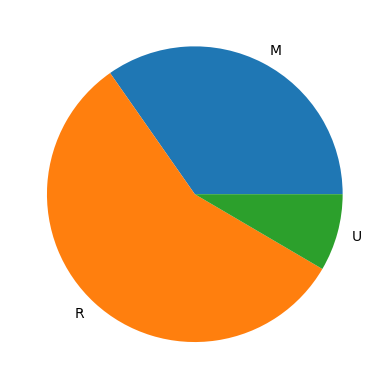

In [133]:
mistakes_labelling.groupby('first_level_tag').size().plot(kind='pie')

<Axes: >

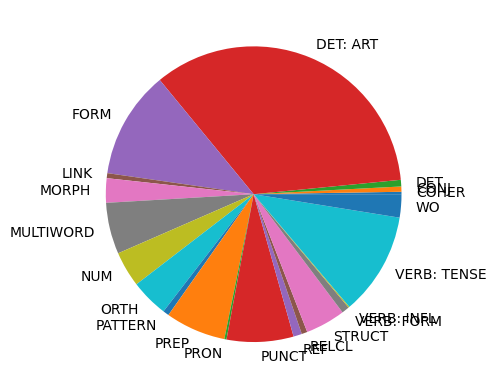

In [134]:
plt.pie(mistakes_labelling.groupby('second_level_tag').size(), labels=mistakes_labelling.groupby('second_level_tag').size().index, colors=plt.cm.tab20.colors)

Много! Исправим.

## Моя разметка: финальная версия

In [135]:
errors_correspondence = {'Capitalisation': 'ORTH',
                         'Formational_affixes': 'FORM',
                         'Derivation': 'FORM',
                         'Noun_number': 'FORM', 
                         'Countable_uncountable': 'FORM',
                         'Category_confusion': 'MORPH',
                         'Articles': 'DET',
                         'Determiners': 'DET',
                         'Prepositional_noun': 'POS', # PREP
                         'Prepositions': 'POS', # PREP
                         'Verb_pattern': 'POS', # PREP
                         'Conjunctions': 'POS', # CONJ
                         'Pronouns': 'POS', # PRON
                         'Tense_choice': 'VERB', 
                         'Tense_form': 'VERB',
                         'Voice': 'VERB',
                         'Modals': 'VERB',
                         'Numerals': 'NUM',
                         'lex_item_choice': 'WORD',
                         'Absence_comp_sent': 'WORD',
                         'Inappropriate_register': 'WORD',
                         'Ref_device': 'WORD', 
                         'Linking_device': 'WORD',
                         'Punctuation': 'PUNCT',
                         'Relative_clause': 'PUNCT',
                         'Redundant_comp': 'RED', 
                         'Confusion_of_structures': 'MULTIWORD',
                         'Word_order': 'MULTIWORD', 
                         'Word_choice': 'MULTIWORD',
                         'Absence_explanation': 'MULTIWORD',
                         'Coherence': 'MULTIWORD'
                         }

Проверим, что получится:

In [136]:
mistakes_labelling["second_level_tag"] = mistakes_labelling.apply(lambda row: assign_secondary_tag(row["mistake_type"]), axis=1)

In [137]:
mistakes_labelling

,level_0,index,mistake_id,text_id,sentence_id,mistake_type,error_span,correction,span_start,span_end,year,bigger_code,first_level_tag,second_level_tag
1,3,5,6,1,1,Articles,Given diagram,The given diagram,0,13,Exam2014_Task 1,Grammar,M,DET
2,4,7,8,1,2,Absence_explanation,century,XXth century,200,207,Exam2014_Task 1,Discourse,M,MULTIWORD
3,5,9,10,1,4,Articles,a population,the Japanese population,436,448,Exam2014_Task 1,Grammar,R,DET
4,6,10,11,1,4,Absence_explanation,a population,the Japanese population,436,448,Exam2014_Task 1,Discourse,R,MULTIWORD
5,7,11,12,1,4,Tense_choice,would be,is going to be,449,457,Exam2014_Task 1,Grammar,R,VERB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61864,82983,9493,16,453,5,Articles,the young age participants,young age participants,623,649,Exam2020_Task 8,Grammar,U,DET
61865,82984,9501,24,453,6,Noun_number,group,"groups,",827,832,Exam2020_Task 8,Grammar,R,FORM
61866,82985,9571,5,455,1,Articles,a a great variety,a great variety,49,66,Exam2020_Task 8,Grammar,U,DET
61867,82986,9574,8,455,2,Articles,the approximately the same range,approximately the same range,176,208,Exam2020_Task 8,Grammar,U,DET


In [138]:
articles_df = mistakes_labelling[mistakes_labelling['mistake_type'] == 'Articles']
articles_sampled_df = articles_df.sample(n=7000, random_state=1)
non_articles_df = mistakes_labelling[mistakes_labelling['mistake_type'] != 'Articles']
mistakes_labelling = pd.concat([non_articles_df, articles_sampled_df])
mistakes_labelling.reset_index(drop=True, inplace=True)
mistakes_labelling

,level_0,index,mistake_id,text_id,sentence_id,mistake_type,error_span,correction,span_start,span_end,year,bigger_code,first_level_tag,second_level_tag
0,4,7,8,1,2,Absence_explanation,century,XXth century,200,207,Exam2014_Task 1,Discourse,M,MULTIWORD
1,6,10,11,1,4,Absence_explanation,a population,the Japanese population,436,448,Exam2014_Task 1,Discourse,R,MULTIWORD
2,7,11,12,1,4,Tense_choice,would be,is going to be,449,457,Exam2014_Task 1,Grammar,R,VERB
3,8,12,13,1,4,Punctuation,",",-,482,483,Exam2014_Task 1,Punctuation,R,PUNCT
4,10,16,17,1,5,Absence_explanation,century,XXth century,583,590,Exam2014_Task 1,Discourse,M,MULTIWORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45071,73878,2272,3,105,3,Articles,Industry sector,the Industry sector,288,303,Exam2020_Task 6,Grammar,M,DET
45072,72454,27719,11,1371,3,Articles,Situation,The situation,228,237,Exam2020_Task 5,Grammar,M,DET
45073,2574,7980,54,222,5,Articles,lengh,the length,532,537,Exam2014_Task 1,Grammar,R,DET
45074,80835,23339,5,1283,6,Articles,percentage value,the percentage value,463,479,Exam2020_Task 7,Grammar,M,DET


<Axes: >

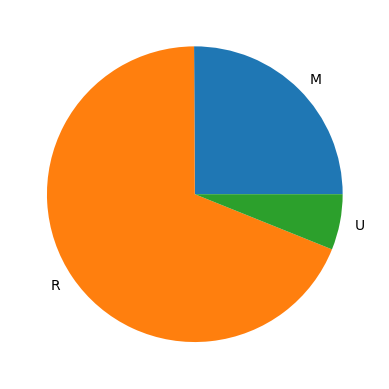

In [139]:
mistakes_labelling.groupby('first_level_tag').size().plot(kind='pie')

([<matplotlib.patches.Wedge at 0x7f146ad55b20>,
 [Text(0.9562359747944941, 0.5437028237087093, 'DET'),
  Text(0.0666575566558449, 1.0979784925674423, 'FORM'),
  Text(-0.5496902290436686, 0.9528067233672942, 'MORPH'),
  Text(-0.8926235258549791, 0.6428244247772681, 'MULTIWORD'),
  Text(-1.0874436307172175, 0.16572974993209913, 'NUM'),
  Text(-1.083556680811736, -0.18948593475045566, 'ORTH'),
  Text(-0.8645910044629794, -0.6800605818614225, 'POS'),
  Text(-0.2804529072380709, -1.0636475764188598, 'PUNCT'),
  Text(0.0891404698602669, -1.0963822219614339, 'RED'),
  Text(0.6148990914435102, -0.9120850329557797, 'VERB'),
  Text(1.0679143963259115, -0.26374010335909154, 'WORD')])

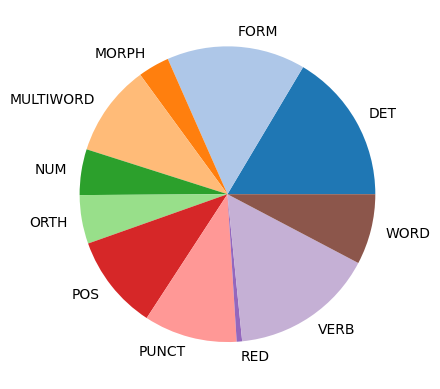

In [186]:
plt.pie(mistakes_labelling.groupby('second_level_tag').size(), labels=mistakes_labelling.groupby('second_level_tag').size().index, colors=plt.cm.tab20.colors)

<Axes: xlabel='second_level_tag'>

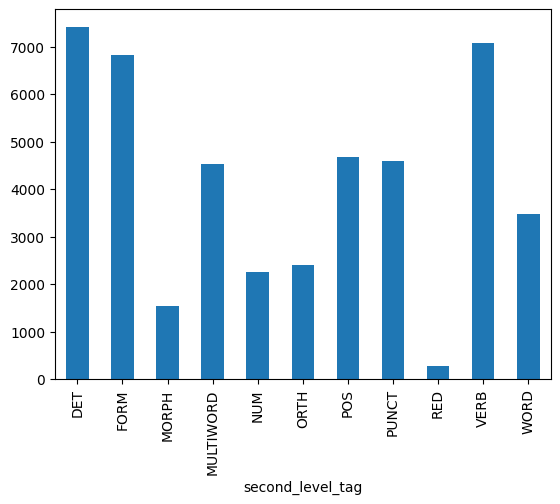

In [179]:
mistakes_labelling.groupby('second_level_tag').size().plot(kind='bar')

In [142]:
mistakes_labelling.to_csv('/home/zlovoblachko/diploma/Labelled_dataset.tsv', sep='\t', encoding='utf-8', index=False)

In [154]:
mistakes_labelling['error_span_len'] = mistakes_labelling.apply(lambda row: len(row["error_span"].split()), axis=1)
mistakes_labelling['correction_span_len'] = mistakes_labelling.apply(lambda row: len(row["correction"].split()), axis=1)

In [161]:
mistakes_labelling.groupby('mistake_type')[['error_span_len', 'correction_span_len']].mean().sort_values('error_span_len')

,error_span_len,correction_span_len
mistake_type,,
Noun_number,1.034030,1.051550
Formational_affixes,1.041528,1.039867
Capitalisation,1.091743,1.149708
Pronouns,1.102190,1.189781
Conjunctions,1.108434,1.231928
Category_confusion,1.115136,1.181113
Derivation,1.137255,1.163399
Tense_choice,1.220427,1.274441
Countable_uncountable,1.255319,1.290780


In [163]:
spans_length = mistakes_labelling.groupby('mistake_type')[['error_span_len', 'correction_span_len']].mean().sort_values('error_span_len')

<Axes: xlabel='mistake_type'>

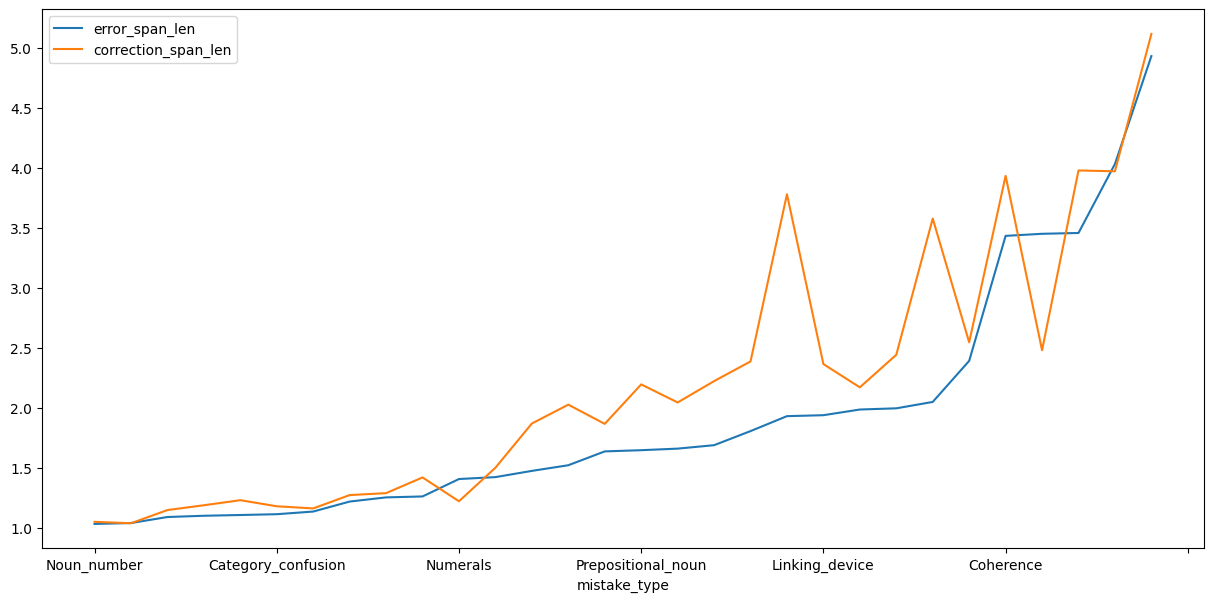

In [174]:
mistakes_labelling.groupby('mistake_type')[['error_span_len', 'correction_span_len']].mean().sort_values('error_span_len').plot(kind='line', figsize=(15,7))

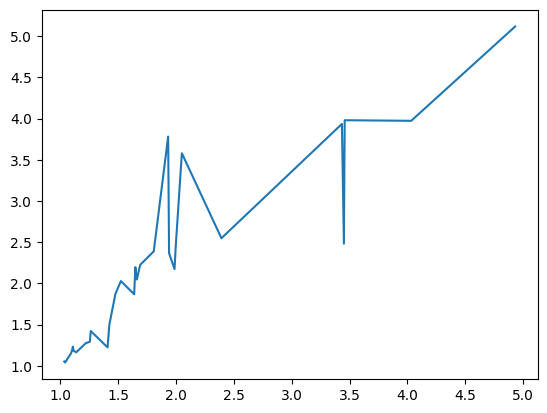

In [172]:
plt.figure()
plt.plot('error_span_len', 'correction_span_len', data=spans_length)